In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [2]:
original_dataset = pd.read_csv('./input/master.csv')
original_dataset.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4455,Brazil,2008,female,15-24 years,398,17432076,2.28,Brazil2008,NaN,"1,695,824,571,927",9555,Millenials
10299,Greece,2008,male,35-54 years,115,1650138,6.97,Greece2008,NaN,"354,460,802,549",33168,Boomers
19045,Philippines,2010,male,25-34 years,400,7256791,5.51,Philippines2010,0.654,"199,590,775,189",2412,Generation X
23851,Spain,2011,male,5-14 years,1,2317337,0.04,Spain2011,0.870,"1,488,067,258,325",34097,Generation Z
15963,Malta,1997,female,75+ years,0,10300,0.00,Malta1997,NaN,"3,705,372,039",10575,G.I. Generation


In [3]:
# Creating a dataset copy
dataset = original_dataset.copy()

# Renaming a few columns to make interpretaion and coding easier
dataset.rename(columns={'suicides_no':'total_suicides', 'suicides/100k pop':'suicides_per_100k', ' gdp_for_year ($) ':'gdp_for_year',
                       'gdp_per_capita ($)':'gdp_per_capita', 'HDI for year': 'HDI_for_year'}, inplace=True)

# Dropping country-year
dataset = dataset.drop('country-year', axis=1)

# Converting gdp per year which are  strings to numbers.
dataset.gdp_for_year = dataset.gdp_for_year.apply(lambda x: float(''.join(x.split(','))))
dataset

,country,year,sex,age,total_suicides,population,suicides_per_100k,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2.156625e+09,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,6.306708e+10,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,6.306708e+10,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,6.306708e+10,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,6.306708e+10,2309,Generation Z


In [4]:
agg_dict = {'country':'nunique', 'age':'nunique', 'population':'sum', 'total_suicides':'sum', 'suicides_per_100k':'mean'}
both_ends = dataset.query('year < 1988 | year > 2013')[['year', 'country', 'age', 'population', 'total_suicides', 'suicides_per_100k']].groupby('year').agg(agg_dict).rename(columns={
    'country':'Distinct Countries', 
    'age':'Age groups',
    'population':'Sum of Population',
    'total_suicides':'Sum of Suicides',
    'suicides_per_100k':'Averaging Suicides Ratio per 100k'})
both_ends['Calculated Suicide Ratio'] = 1e5 * both_ends['Sum of Suicides'] / both_ends['Sum of Population']
both_ends

,Distinct Countries,Age groups,Sum of Population,Sum of Suicides,Averaging Suicides Ratio per 100k,Calculated Suicide Ratio
year,,,,,,
1985,48,6,1008600086,116063,11.826198,11.507336
1986,48,6,1029909613,120670,11.423333,11.716562
1987,54,6,1095029726,126842,11.644213,11.583430
2014,78,6,1912057309,222984,11.011464,11.661994
2015,62,6,1774657932,203640,11.094073,11.474887
2016,16,5,132101896,15603,13.421187,11.811337


In [5]:
# Removing the year 2016 from our processed dataset because it has only 16 countires & missing the age group of 4-15 
dataset = dataset.query('year != 2016')

In [6]:
countries_lookup = pd.read_csv('./input/countries_lookup.csv')
countries_lookup.head(3)
dataset = dataset.merge(countries_lookup[['TableName', 'Country Code', 'Region']],
                        how='left', left_on='country', right_on='TableName').drop('TableName', axis=1)
dataset.loc[dataset["country"] == 'Republic of Korea', 'Region'] = 'East Asia & Pacific'
dataset.loc[dataset["country"] == 'Saint Lucia', 'Region'] = 'Latin America & Caribbean'
dataset.loc[dataset["country"] == 'Kyrgyzstan', 'Region'] = 'Europe & Central Asia'
dataset.loc[dataset["country"] == 'Bahamas', 'Region'] = 'North America'
dataset.loc[dataset["country"] == 'Slovakia', 'Region'] = 'Europe & Central Asia'
dataset.loc[dataset["country"] == 'Saint Kitts and Nevis', 'Region'] = 'Latin America & Caribbean'
dataset.loc[dataset["country"] == 'Macau', 'Region'] = 'East Asia & Pacific'
dataset.loc[dataset["country"] == 'Saint Vincent and Grenadines', 'Region'] = 'Latin America & Caribbean'
s_a_countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
                'Guyana', 'Paraguay', 'Suriname', 'Trinidad and Tobago', 'Uruguay']
c_a_countries = ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Mexico',
                'Nicaragua', 'Panama']
car_countries = ['Antigua and Barbuda', 'Aruba', 'Barbados', 'Cuba', 'Dominica', 'Jamaica', 
                 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Grenada', 
                 'Saint Vincent and Grenadines']

dataset.loc[dataset['country'].isin(s_a_countries), 'Region'] = 'South America'
dataset.loc[dataset['country'].isin(c_a_countries), 'Region'] = 'Central America'
dataset.loc[dataset['country'].isin(car_countries), 'Region'] = 'Caribbean'

In [7]:
agg_dict = {'country':'nunique', 'population':'sum', 'total_suicides':'sum'}
yearly_data = dataset[['year', 'country', 'population', 'total_suicides']].groupby('year', as_index=False).agg(agg_dict)

yearly_data.rename(columns={'population':'Population', 'total_suicides':'Total Suicides'}, inplace=True)
yearly_data['Suicides by 100k people'] = 100000 * yearly_data['Total Suicides'] / ( yearly_data['Population'] )

In [8]:
countries_lookup = dataset[['country', 'Region',
                            'population']].groupby(['country', 'Region'], as_index = False).mean()


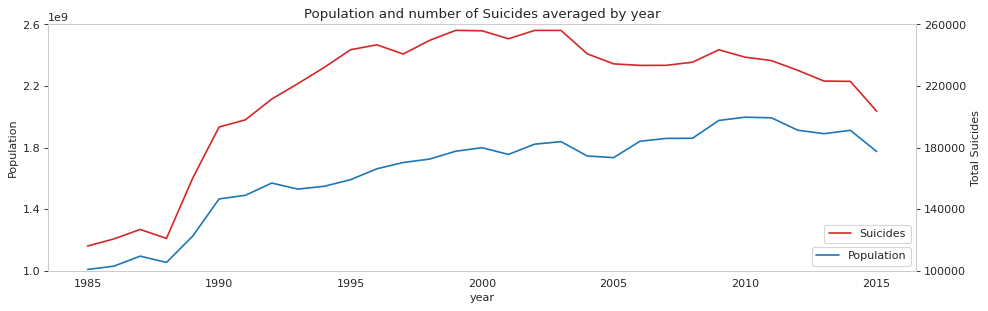

In [9]:
fig, ax1 = plt.subplots(1,1,figsize=(14,4), dpi=80, sharey=False)

sns.lineplot(data=yearly_data, y='Population', x='year', ax=ax1, label='Population')
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1, 0.12))
ax1.set_yticks([1e9, 1.4e9, 1.8e9, 2.2e9, 2.6e9]);
ax1.set_ylim(1e9, 2.6e9)

ax2 = plt.twinx()
sns.lineplot(data=yearly_data, y='Total Suicides', x='year', ax=ax2, color='C3', label='Suicides')
ax2.grid(False)
ax2.set_ylim(1e5, 2.6e5)
ax2.set_yticks([1e5, 1.4e5, 1.8e5, 2.2e5, 2.6e5]);
ax2.legend(bbox_to_anchor=(1, 0.21))

plt.title('Population and number of Suicides averaged by year');

In [10]:
# Defining this because I will use it quite often to make the plots somewhat standard
def standard_plot(title=None, x=None, y=None):
    
    fig, ax = plt.subplots(figsize=(12,4), dpi=80)
    
    ax.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.label.set_fontsize(12)
    ax.yaxis.label.set_fontsize(14)
   
    if title != None:
        ax.set_title(title)
        ax.title.set_fontsize(15)
        
    if x != None:
        ax.set_xlabel(x)
        
    if y != None:
        ax.set_ylabel(y)
          
    return fig, ax



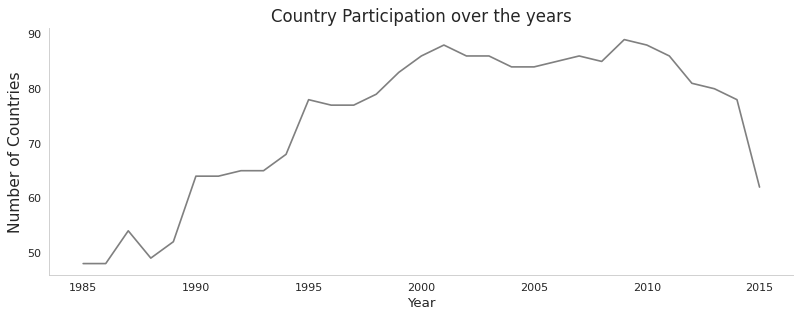

In [11]:
fig, ax = standard_plot('Country Participation over the years')
sns.lineplot(data=yearly_data, x='year', y='country', color='gray', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Countries');


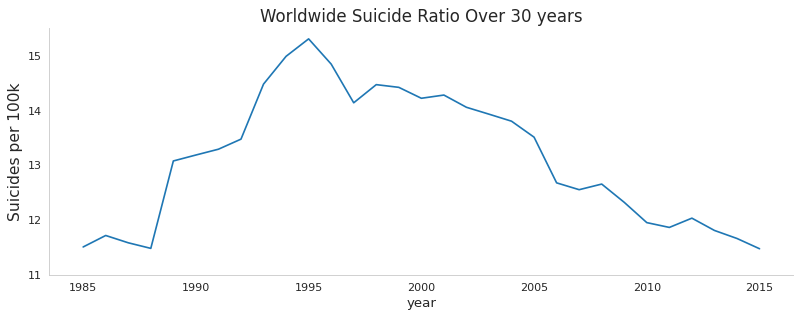

In [12]:
fig, ax = standard_plot('Worldwide Suicide Ratio Over 30 years',
                        y='Suicides per 100k', x='Years')
yearly_data.plot(kind='line', x='year', y='Suicides by 100k people', ax=ax, legend=False, grid=False)
ax.set_yticks([11, 12, 13, 14, 15]);

In [13]:
countries_lookup = pd.read_csv('./input/countries_lookup.csv')
countries_lookup.head(3)


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN


In [14]:
dataset = dataset.merge(countries_lookup[['TableName', 'Country Code', 'Region']],
                        how='left', left_on='country', right_on='TableName').drop('TableName', axis=1)

In [15]:
countries_lookup = dataset[['country', 'Region', 'population']].groupby(['country', 'Region'], as_index = False).mean()
#countries_lookup.to_csv('Auxiliary data/countries_lookup_v2.csv', index=False)

KeyError: "['Region'] not in index"

In [16]:
aux_cols = ['Region', 'year', 'country', 'total_suicides', 'population']
region_data = dataset[aux_cols].groupby(['Region', 'year'], as_index=False).agg({'total_suicides':'sum', 'population':'sum', 'country':'nunique'})
region_data['Suicides per 100k'] = 1e5 * region_data['total_suicides'] / region_data['population']

regions = region_data['Region'].value_counts().index

KeyError: "['Region'] not in index"

NameError: name 'regions' is not defined

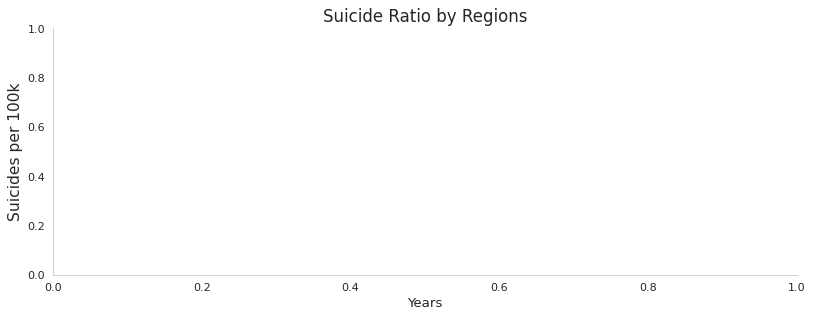

In [17]:
fig, ax = standard_plot('Suicide Ratio by Regions', 'Years', 'Suicides per 100k')

for reg in regions:
    ax.plot('year', 'Suicides per 100k', data=region_data.query("Region == @reg"), label=reg)
    
plt.legend();


In [18]:
dataset.query("Region == 'South Asia'")[aux_cols].groupby(
    ['year', 'country']).agg({'total_suicides':'sum', 'population':'sum'}).loc[[1999, 2000, 2004]]


UndefinedVariableError: name 'Region' is not defined

In [ ]:
fig, ax = standard_plot('Country Participation over the years')
sns.lineplot(data=yearly_data, x='year', y='country', color='gray', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Countries');


In [ ]:
def country_year_range(data, start=None, end=None):
    if (start == None) and (end == None):
        data = data
    
    elif end == None:
        data = data.query('year >= @start')
        
    elif start == None:
        data = data.query('year <= @end')
        
    else:
        year_range = np.arange(start, end+1)
        data = data.query('year in @year_range')
    
    # Aggregating each column properly.
    agg_dict = {'country':'count', 'year':'nunique', 'total_suicides':'sum', 'population':'sum',}
    df = data[['country', 'year', 'total_suicides', 'population']].groupby('country').aggregate(agg_dict)

    # Creating our usual feature
    df['Avg. Suicide per 100k'] = df['total_suicides'] * 1e5 / (df['population'])

    df = df.drop(['country', 'total_suicides', 'population'], axis=1)
    df.rename(columns={'year':'Years_Present'}, inplace = True)
    
    return df


In [ ]:
# Country data for the whole dataset
country_data = country_year_range(dataset)

# Country data after (and including) 2011
rec_country_data = country_year_range(dataset, start=2011)

In [ ]:
frequent_countries = country_data.query("Years_Present >= 15").sort_values('Avg. Suicide per 100k', ascending=False)
r_frequent_countries = rec_country_data.query("Years_Present >= 4").sort_values('Avg. Suicide per 100k', ascending=False)

# Defining the 2 x 2 graph grid
fig, (row1, row2) = plt.subplots(2,2, figsize=(10,6), dpi=90, sharex=True)


# FIRST ROW
# Left Graph
row1[0].set_title('Highest Suicide Rates 1985~2015')
sns.barplot(data=frequent_countries[:10], x='Avg. Suicide per 100k',
            y=frequent_countries[:10].index, ax=row1[0], palette='magma')
row1[0].xaxis.label.set_visible(False)
row1[0].yaxis.label.set_visible(False)
row1[0].xaxis.set_ticks_position('top')

# Right Graph
row1[1].set_title('Lowest Suicide Rates 1985~2015')
sns.barplot(data=frequent_countries[-10:], x='Avg. Suicide per 100k',
            y=frequent_countries[-10:].index, ax=row1[1], palette='BuGn')
row1[1].xaxis.label.set_visible(False)
row1[1].yaxis.label.set_visible(False)
row1[1].xaxis.set_ticks_position('top')


# SECOND ROW
# Left Graph
row2[0].set_title('Highest Suicide Rates 2011~2015')
sns.barplot(data=r_frequent_countries[:10], x='Avg. Suicide per 100k',
            y=r_frequent_countries[:10].index, ax=row2[0], palette='magma')
row2[0].yaxis.label.set_visible(False)

# Right Graph
row2[1].set_title('Lowest Suicide Rates 2011~2015')
sns.barplot(data=r_frequent_countries[-10:], x='Avg. Suicide per 100k',
            y=r_frequent_countries[-10:].index, ax=row2[1], palette='BuGn')
row2[1].yaxis.label.set_visible(False)

plt.tight_layout();


In [ ]:
country_year_gb = dataset.groupby(['country', 'year'],
                                  as_index=False).sum()[['country', 'year', 'total_suicides', 'population']]
country_year_gb['Suicides_per_100k'] = 1e5 * country_year_gb['total_suicides'] / country_year_gb['population']

nnfive = country_year_gb.query("year in [1989, 1995]").pivot_table(
    index='country', columns='year', values=['total_suicides', 'Suicides_per_100k'], aggfunc='sum')

nnfive['Changes in Number of Suicides'] = (nnfive.iloc[:,3] - nnfive.iloc[:,2])

nnfive.sort_values('Changes in Number of Suicides', ascending=False)[:6]


In [ ]:
# Creating a filtered dataset by removing Russia and calculation our Ratio
without_russia = dataset.query("country != 'Russian Federation'").groupby('year', as_index=False).sum()
without_russia['Suicides by 100k people'] = 1e5 * without_russia['total_suicides'] / (without_russia['population'])


In [ ]:
## Primary Axis - Population
# Plotting
fig, ax1 = plt.subplots(1,1,figsize=(10,4), dpi=90, sharey=False)
yearly_data.plot(x='year', y='Population', ax=ax1, label='Population with Russia', c='C0', ls='-')
without_russia.plot(x='year', y='population', ax=ax1, label='Population without Russia', c='C0', ls='--')
# Formatting
ax1.set_ylim(1e9, 2.6e9)
ax1.set_yticks([1e9, 1.4e9, 1.8e9, 2.2e9, 2.6e9])
ax1.grid(False)
ax1.set_ylabel('Population')

## Secondary Axis - Suicides
# Plotting
ax1b = ax1.twinx()
yearly_data.plot(x='year', y='Total Suicides', ax=ax1b, c='C3', ls='-', label='Suicides with Russia')
without_russia.plot(x='year', y='total_suicides', ax=ax1b, c='C3', ls='-.', label='Suicides without Russia')
# Formatting
ax1b.set_ylim(1e5, 2.6e5)
ax1b.grid(False)
ax1b.set_ylabel('Suicides')
ax1b.set_yticks([1e5, 1.4e5, 1.8e5, 2.2e5, 2.6e5])

plt.tight_layout()
ax1.legend(bbox_to_anchor=(1, 0.2));


In [ ]:
fig, ax = standard_plot('Number of Suicides for every 100k people', 'Year', 'Suicide Ratio per 100k')
without_russia.plot(kind='line', x='year', y='Suicides by 100k people', ax=ax, label='Without Russia', grid=False)
yearly_data.plot(kind='line', x='year', y='Suicides by 100k people', ax=ax, label='With Russia', c='C3', grid=False);


In [ ]:
dataset.age = dataset.age.replace({'5-14 years':'05-14 years'})

In [ ]:
# Again, just following the rule: 'If you used it three times, make it a function'
def demographic_country_filter(data, keep=None, remove=None):
    
    agg_dict = {'year':'nunique', 'population':'sum', 'total_suicides':'sum'}
    
    if keep == remove:
        # Means no country filters are being passed
        data = data.pivot_table(values=['total_suicides', 'population'], index='age', columns='sex', aggfunc='sum')
        data['Avg Suicides', 'male'] = 1e5 * data['total_suicides', 'male'] / data['population', 'male']
        data['Avg Suicides', 'female'] = 1e5 * data['total_suicides', 'female'] / data['population', 'female']        
        return data

    elif keep != None:
        countries_list = keep
        data = data.query("country in @countries_list").pivot_table(values=['total_suicides', 'population'], index='age', columns='sex', aggfunc='sum')
        data['Avg Suicides', 'male'] = 1e5 * data['total_suicides', 'male'] / data['population', 'male']
        data['Avg Suicides', 'female'] = 1e5 * data['total_suicides', 'female'] / data['population', 'female']
        return data
    
    else:
        exclude_list = remove
        data = data.query("country not in @exclude_list").pivot_table(values=['total_suicides', 'population'], index='age', columns='sex', aggfunc='sum')
        data['Avg Suicides', 'male'] = 1e5 * data['total_suicides', 'male'] / data['population', 'male']
        data['Avg Suicides', 'female'] = 1e5 * data['total_suicides', 'female'] / data['population', 'female']
        return data

In [ ]:
# Creating the data for all countries
demo_all = demographic_country_filter(dataset)

# Creating the data for Brazil
demo_brazil = demographic_country_filter(dataset, keep='Brazil')

# Picking random country
countries_all_years = country_data.query("Years_Present == 31").index
rand_country = countries_all_years[np.random.randint(0, 23)]
demo_random = demographic_country_filter(dataset, keep=rand_country)


In [ ]:
fig, axes = plt.subplots(1,3, figsize=(12,3), dpi=85, sharey=True)

# Left plot, World-data
sns.heatmap(data=demo_all['Avg Suicides'], annot=True, ax=axes[0], vmax=45, cmap='OrRd')
axes[0].set_title('Average Suicide/100k all Countries');

# Middle plot, Brazil 
sns.heatmap(data=demo_brazil['Avg Suicides'], annot=True, ax=axes[1], vmax=45, cmap='OrRd')
axes[1].yaxis.label.set_visible(False)
axes[1].set_title('Average Suicide/100k for Brazil')

# Right plot, random country present in all years
sns.heatmap(data=demo_random['Avg Suicides'], annot=True, ax=axes[2], vmax=45, cmap='OrRd')
axes[2].yaxis.label.set_visible(False)
axes[2].set_title(f'Average Suicide/100k for {rand_country}')

plt.tight_layout();


In [ ]:
fig, ax = standard_plot('Suicide Ratio by Generations', 'Year', 'Suicide per 100k')
dataset.pivot_table(values='suicides_per_100k', index='year',
                    columns='generation', aggfunc='mean').plot(ax=ax, grid=False);

In [ ]:
# Getting the sums (population and suicides)
gdp_hdi_sums = dataset[['country', 'year', 'population',
                        'total_suicides']].groupby(['country', 'year'], as_index=False).sum()

# Getting the GDP and HDI values
gdp_hdi_avgs = dataset[['country', 'year', 'gdp_per_capita',
                        'HDI_for_year']].groupby(['country', 'year'], as_index=False).mean()

# Joining both
gdp_hdi = pd.concat([gdp_hdi_avgs, gdp_hdi_sums[['population', 'total_suicides']]], axis=1)

# Adding information for Regions
gdp_hdi['Region'] = gdp_hdi.merge(countries_lookup, on='country', how='left')['Region']

# Calculation the Suicide Ration
gdp_hdi['Avg Suicides per 100k'] = 1e5 * gdp_hdi['total_suicides'] / gdp_hdi['population']

In [ ]:
gdp_hdi['log_gdp'] = np.log1p(gdp_hdi['gdp_per_capita'])
gdp_hdi['log_suicide_ratio'] = np.log1p(gdp_hdi['Avg Suicides per 100k'])

In [ ]:
'''
fig, (row1, row2) = plt.subplots(2,2,figsize=(14,5), dpi=80)

gdp_hdi['gdp_per_capita'].hist(bins=20, ax=row1[0])
gdp_hdi['log_gdp'].hist(bins=20, ax=row1[1])
row1[0].grid(False)
row1[1].grid(False)
row1[0].set_title('GDP')
row1[1].set_title('Log GDP')

gdp_hdi['Avg Suicides per 100k'].hist(bins=20, ax=row2[0])
gdp_hdi['log_suicide_ratio'].hist(bins=20, ax=row2[1])
row2[0].grid(False)
row2[1].grid(False)
row2[0].set_title('Suicide Ratio')
row2[1].set_title('Log Suicide Ratio')
plt.tight_layout();
'''


In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
sns.scatterplot(data=gdp_hdi.query("country in @countries_all_years"), x='gdp_per_capita', style='Region',
                y='Avg Suicides per 100k', hue='country', palette='tab20', ax=ax)
plt.legend().set_visible(False) #(bbox_to_anchor=[1, 1], prop={'size':7})

# Dealing with the scale
ax.set_xlim(1e3, 12e4)
ax.set(xscale="log", yscale="log")
ax.set_ylim(bottom=2, top=30)
ax.set_yticks([2.5, 5, 10, 20, 40])
ax.set_yticklabels([2.5, 5, 10, 20, 40])

# Formatting
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(12)
ax.title.set_fontsize(13)
ax.grid(False)

# Naming stuff
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Suicide Ratio per 100k')
ax.set_title('Suicide Ratio versus GDP for countries present in all years');


In [ ]:
atleast_15 = gdp_hdi.country.value_counts()[:84].index
gdp_atleast15 = gdp_hdi.query("country in @atleast_15")

In [ ]:
correlations = []

for ctr in atleast_15:
    temp_data = gdp_atleast15.query("country == @ctr")
    correlations.append(temp_data[['gdp_per_capita', 'Avg Suicides per 100k']].corr().iloc[0, 1])

correlations = np.array(correlations)

country_corr = pd.DataFrame({'country':atleast_15, 'GDP-Suicide Correlation':correlations})
country_corr = country_corr.merge(countries_lookup, on='country', how='left').dropna()

In [ ]:
s_a   = gdp_atleast15.query("Region == 'South America'").country.unique()
c_a   = gdp_atleast15.query("Region == 'Central America'").country.unique()
car   = gdp_atleast15.query("Region == 'Caribbean'").country.unique()
n_a   = gdp_atleast15.query("Region == 'North America'").country.unique()
eu_ca = gdp_atleast15.query("Region == 'Europe & Central Asia'").country.unique()
ea_pa = gdp_atleast15.query("Region == 'East Asia & Pacific'").country.unique()
me_na = gdp_atleast15.query("Region == 'Middle East & North Africa'").country.unique()
ss_a  = gdp_atleast15.query("Region == 'Sub-Saharan Africa'").country.unique()
# South Asia has no country present in this 15 years filter
#s_as  = gdp_atleast15.query("Region == 'South Asia'").country.unique()

region_order = np.concatenate([s_a, c_a, car, n_a, eu_ca, ea_pa, me_na, ss_a]) #, s_as])
hue_order = ['South America', 'Central America',  'Caribbean', 'North America', 'Europe & Central Asia',
             'East Asia & Pacific', 'Middle East & North Africa', 'Sub-Saharan Africa'] #,'South Asia']

In [ ]:
fig, ax = plt.subplots(figsize=(12,18), dpi=80)
sns.barplot(data=country_corr, y='country', x='GDP-Suicide Correlation', hue='Region', dodge=False,
            palette='tab10', order=region_order, hue_order=hue_order)
ax.set_title('Pearson Correlation between GDP and Suicide Ratio by Region and Country')
ax.xaxis.tick_top()
ax.xaxis.label.set_visible(False)
ax.legend(bbox_to_anchor=[1.0, 0.89]);


In [ ]:


fig, ax = plt.subplots(figsize=(8,6), dpi=100)
another_fn_list = ['Republic of Korea', 'United Kingdom', 'Malta', 'United States', 'Russian Federation']
sns.scatterplot(data=gdp_hdi.query("country in @another_fn_list"), x='gdp_per_capita', style='country',
                y='Avg Suicides per 100k', size='year', ax=ax, hue='country', palette='tab10')
plt.legend(prop={'size':7}).set_visible(True)

# Dealing with the scale
ax.set_xlim(1e3, 12e4)
ax.set(xscale="log", yscale="log")
ax.set_ylim(bottom=2, top=50)
ax.set_yticks([2.5, 5, 10, 20, 40])
ax.set_yticklabels([2.5, 5, 10, 20, 40])

# Formatting
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(12)
ax.title.set_fontsize(13)
ax.grid(False)

# Naming stuff
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Suicide Ratio per 100k')
ax.set_title('Suicide Ratio versus GDP for Selected Countries');

In [ ]:
country_year_temperature_data = pd.read_csv('./input/temperature_data.csv')
country_temperature_data = country_year_temperature_data.groupby('country').mean()

In [ ]:
temperature_data = country_data.merge(country_temperature_data,
                                      left_index=True,
                                      right_on='country',
                                      how='left')

fig, ax = standard_plot('SR versus Temperature', 'Average Temperature', 'SR')
fig.set_size_inches(8,8)
sns.regplot(data = temperature_data, x='avg_temp',
              y='Avg. Suicide per 100k', ax=ax, color='C3')
ax.set_xlabel('Average Temperature between 1985 and 2015');

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1561735467494' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;Suicide_ratio_Dashboard&#47;SuicidebyCountry&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Suicide_ratio_Dashboard&#47;SuicidebyCountry' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;Suicide_ratio_Dashboard&#47;SuicidebyCountry&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1561735467494');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='800px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
# Main Code at https://www.kaggle.com/code/fredzanella/should-we-care-about-money-an-eda-on-suicide#4---Religions-and-Sun-Exposure